## Plotting Neos
By Stuart Kwan

2024-02-25 - COMP 215

This project aims to plot the closest NEOs to Earth using NASA's  NeoWs API.

Credit: Some parts of code were based closely or exactly taken from Joseph Fall's Lab 2 - Records (NEO), [MIT Lisence](https://github.com/powderflask/cap-comp215/blob/2024.01/LICENSE)

### Editable Values

In [ ]:
# The start and end dates should be written 'YYYY-MM-DD'. Default start date is today and the default end date is last week.
# Note: Be warned the max API request cap is at 1000 req/hr and depending on the amount of neos, this cap will be hit quickly.
# Dates will stop rendering after a certain amount of NEOs are plotted.
start_date = '2024-02-25'
end_date = '2024-02-20'

# Option to plot only potentially hazardous NEOs. Default is False.
is_hazardous = False

# Options to plot one or more NEOs. Only one option can true on at a time.
run_multi_neo = True
run_single_neo = False

# Enter a NEO id if only plotting a single neo.
neo_id = '2523971'

### Imports + Global Variables

In [ ]:
# Imports
import json, requests
import datetime
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
# Global Variables
API_KEY = 'vN3UA35SEZcPWPRTlWcC3FY2fbSpHXrjdEpwoeNA'
today = datetime.datetime.now()
seven_days = datetime.timedelta(days=7)

### Function Definitions

In [ ]:
# These functions get data about NEOs using the NeoWs API.
def get_neo_data(start_date, end_date):
    """ Returns a dict of NEO data between a specified start and end date. """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    return data

def get_single_neo(id):
    """ Returns a dict of a NEO data using its id. """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    return data

In [ ]:
def check_dates(start, end):
    """ Returns a bool if the range between two dates is equal to or smaller than 7 days. """
    return True if datetime.datetime.strptime(start, '%Y-%m-%d') - datetime.datetime.strptime(end, '%Y-%m-%d') <= seven_days else False

def neo_ids(data, hazardous):
    """ Returns a list of NEO ids from a certain date range. """
    ids = []
    if hazardous == True:
        for date in data['near_earth_objects']:
            ids.append([data['near_earth_objects'][date][neo]['id'] for neo in range(len(data['near_earth_objects'][date])) if data['near_earth_objects'][date][neo]['is_potentially_hazardous_asteroid'] == True])
    else:
        for date in data['near_earth_objects']:
            ids.append([data['near_earth_objects'][date][neo]['id'] for neo in range(len(data['near_earth_objects'][date]))])
    return [id for i in ids for id in i]

def neo_dates(data):
    """ Returns a list of dates a single NEO has approached Earth. """
    return [data['close_approach_data'][date]['close_approach_date'] for date in range(len(data['close_approach_data']))]

def miss_distances(data):
    """ Returns a list of distances a single NEO has missed Earth by. """
    return [data['close_approach_data'][miss]['miss_distance']['astronomical'] for miss in range(len(data['close_approach_data']))]

In [ ]:
def plot_graph(id_list, multi_neo_graph):
    """ Plots a graph of distance vs time using a list of NEO ids. """
    fig, ax = plt.subplots(figsize=(35, 10), layout='constrained') # Setting up the graph
    ax.set_xlabel('Dates')
    ax.set_ylabel('Miss Distances (AU)')
    ax.set_title('Miss Distances vs Time')

    for id in id_list: # Plotting each neo selected
        data = get_single_neo(id)
        dates = neo_dates(data)
        distances = miss_distances(data)
        ax.plot([date for date in range(len(dates))], [float(distance) for distance in distances]) # Had to change the datatype of the dates, so they would plot properly
        plt.xticks([date for date in range(len(dates))], dates)

    plt.ylim(bottom=0, top=0.6) # Setting up x and y limits, restricting the size
    plt.xlim(left=20, right=50)
    if multi_neo_graph == True:
        ax.legend(id_list, loc=2, fontsize='medium', ncols=20)
    else:
        ax.legend(id_list, loc=2, fontsize='medium')

    plt.show()

### Main

Graphing 9 NEOs between 2024-02-25 and 2024-02-25.
This graph displays the 20th to 50th passing of a NEO vs the distance in astronomical units.


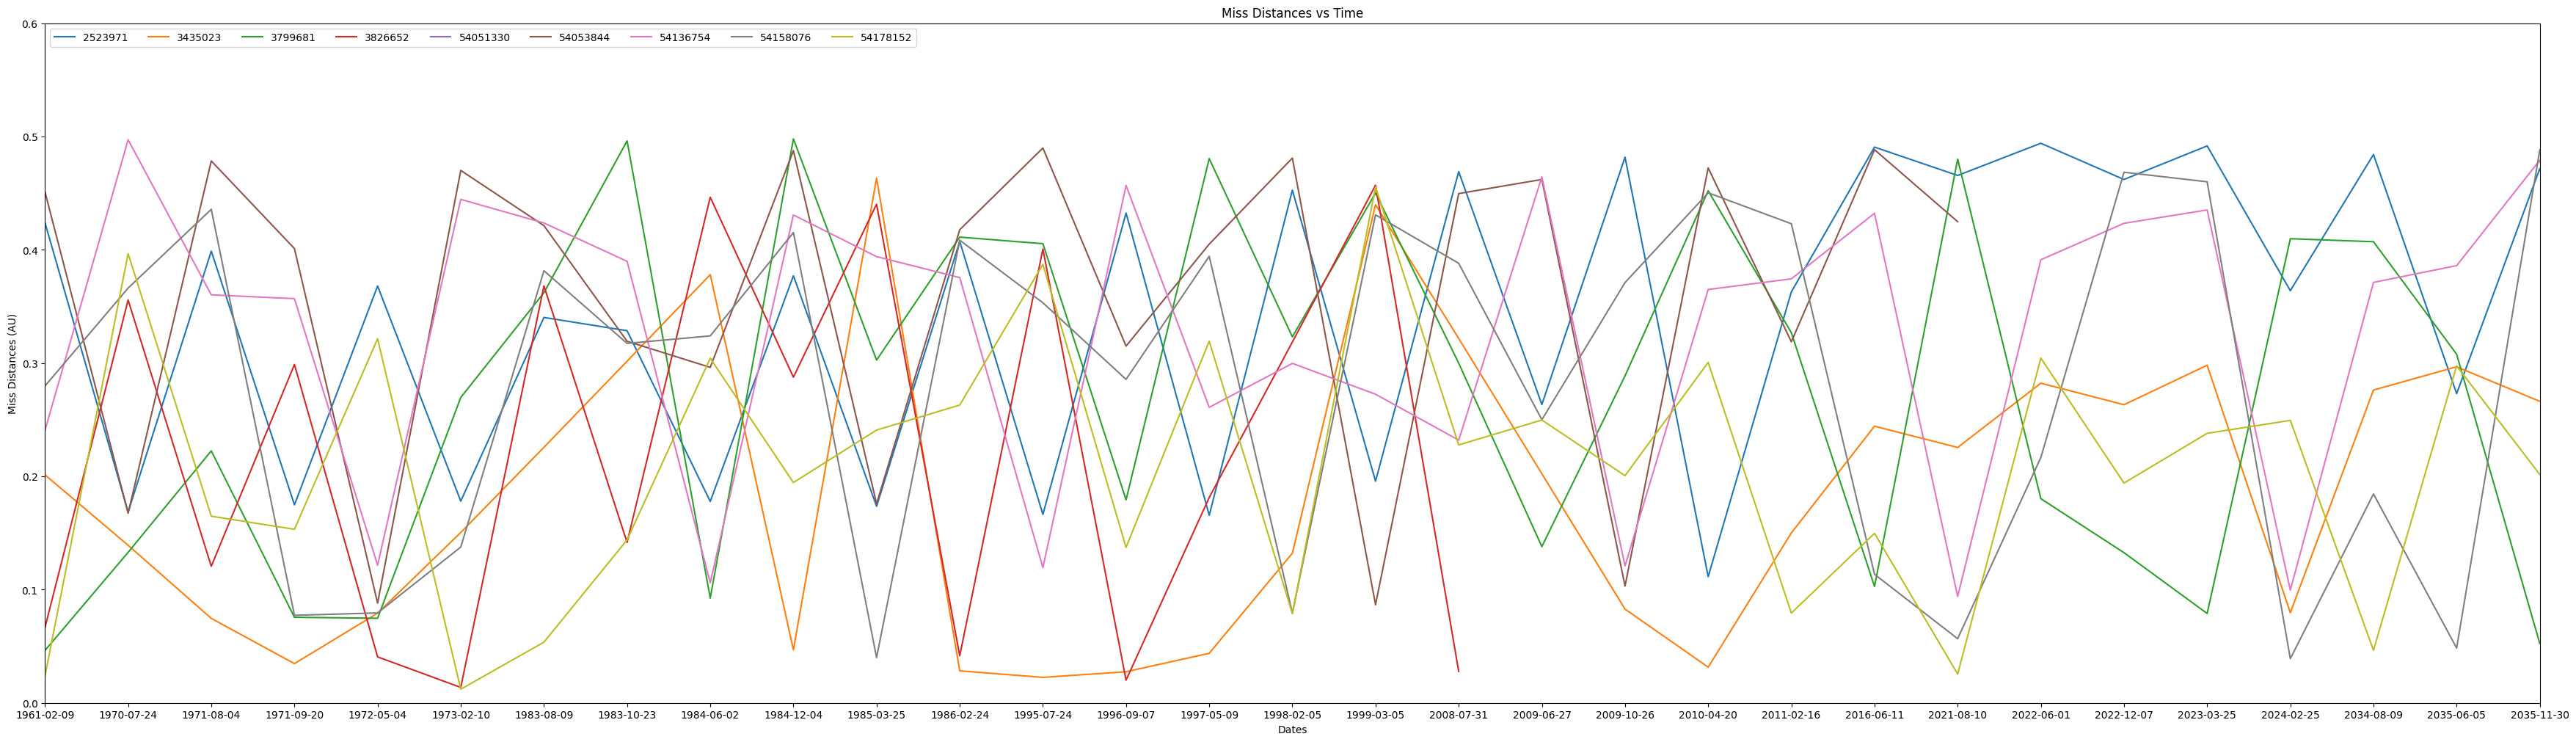

In [ ]:
if run_multi_neo == True and run_single_neo == False:
    try:
        check_dates(start_date, end_date)
    except ValueError:
        print('Invalid dates. Please refer to the proper date format provided.')
    else:
        if check_dates(start_date, end_date) == True:
            neo_id_list = neo_ids(get_neo_data(start_date, end_date), is_hazardous)
            print(f'Graphing {len(neo_id_list)} NEOs between {end_date} and {start_date}.')
            print(f'This graph displays the 20th to 50th passing of a NEO vs the distance in astronomical units.')
            plot_graph(neo_id_list, run_multi_neo)
        else:
            print('Invalid date range.')
elif run_multi_neo == False and run_single_neo == True:
    try:
        get_single_neo(neo_id)
    except json.JSONDecodeError:
        print('Invalid NEO id.')
    else:
        print(f'Graphing Neo ID: {neo_id}.')
        print(f'This graph displays the 20th to 50th passing of a NEO vs the distance in astronomical units.')
        plot_graph([neo_id], run_multi_neo)
else:
    print("Both options toggled. Don't forget to turn one off.")